customer shurn prediction using ANN

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5059,6907-NZZIJ,Female,0,No,No,36,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.15,3615.6,Yes
774,2037-XJFUP,Male,0,Yes,No,33,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,95.80,3036.75,Yes
1058,2074-GKOWZ,Male,0,Yes,Yes,2,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),89.55,185.55,Yes
424,8111-BKVDS,Female,0,No,No,10,No,No phone service,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),40.70,449.3,No
5790,0980-PVMRC,Female,0,Yes,Yes,40,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.85,2036.55,No


In [3]:
df.shape

(7043, 21)

while data exploration we found that customer id not gonna help later so we drop the customer id attribute

In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

in order to correct the above error we uses the following command

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

to find where the value is true for above  in case of total charges

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.iloc[488]['TotalCharges']

' '

In [13]:
df.shape

(7043, 20)

since it is big data containing 7043 rows it won't make differnece if wew delete 11 rows
And we can delete the above 11 rows as follows


In [14]:
df1 = df[df.TotalCharges!=' ']

In [15]:
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

after correction we have our total charges in float

In [17]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [18]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ag800\AppData\Local\Temp\ipykernel_26912\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [19]:
df1.TotalCharges.dtypes

dtype('float64')

now we found that in our data that tenure is a important  we will observe it using histogram


In [20]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


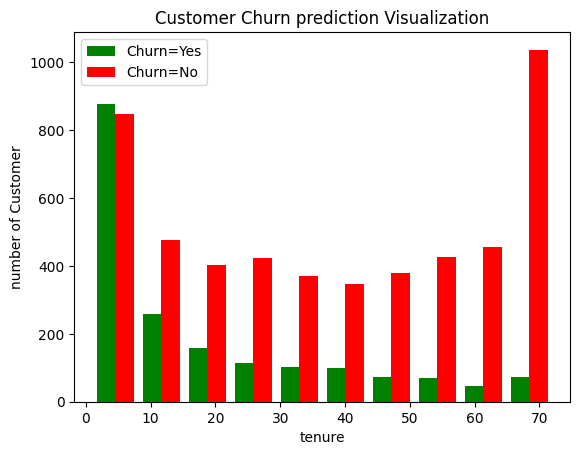

In [21]:
tenure_churn_no = df1[df1['Churn'] == 'No']['tenure']
tenure_churn_yes = df1[df1['Churn'] == 'Yes']['tenure']
plt.xlabel("tenure")
plt.ylabel("number of Customer")
plt.title("Customer Churn prediction Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

now we will do same for monthly charges becouse monthly charges can also be the reason for churn

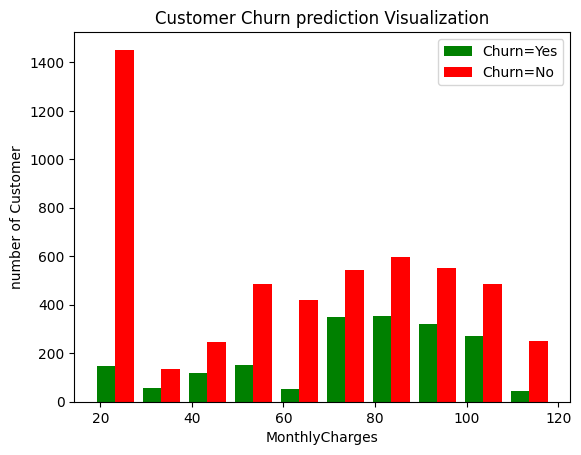

In [22]:
mc_churn_no = df1[df1['Churn'] == 'No']['MonthlyCharges']
mc_churn_yes = df1[df1['Churn'] == 'Yes']['MonthlyCharges']
plt.xlabel("MonthlyCharges")
plt.ylabel("number of Customer")
plt.title("Customer Churn prediction Visualization")
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

as we noticed that many of the columns are in yes or no  
so we will find out the unique values in each columns to figure out yes no columns.

In [23]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes =='object':
            print(f'{column} :{df[column].unique()}')

In [24]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [25]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\ag800\AppData\Local\Temp\ipykernel_26912\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\ag800\AppData\Local\Temp\ipykernel_26912\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [26]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [27]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\ag800\AppData\Local\Temp\ipykernel_26912\3331904816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [28]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [29]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\ag800\AppData\Local\Temp\ipykernel_26912\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [30]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


like wise in contract we use "one hot encoding" method to convert it into 0 and 1 

In [31]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [33]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [ True False]
InternetService_Fiber optic : [False  True]
InternetService_No : [False  True]
Contract_Month-to-month : [ True False]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Bank transfer (automatic) : [False  True]
PaymentMethod_Credit card (automatic) : [False  True]
PaymentMethod_Electroni

In [34]:
True_false_columns = ['InternetService_DSL','InternetService_Fiber optic','InternetService_No',
                 'Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)',
                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']

for col in True_false_columns:
    df2[col].replace({True: 1, False: 0}, inplace=True)


In [35]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [36]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [37]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6972,1,1,0,0,56,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
3264,1,0,0,1,10,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1417,1,1,0,0,18,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4183,0,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


Now we scale our data as it is an important part of our machine learning(it will convert the foloowing between the 0 and 1)

In [38]:
cols_to_scale =['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [39]:
 df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
174,1,0,0,0,0.436620,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3124,0,0,1,1,0.943662,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0


In [40]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

Now our datafame is fully ready to be use in machine learning 
next step is to train test split 


In [41]:
x =df2.drop('Churn',axis = 'columns')
y =df2['Churn']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [43]:
x_train.shape          #80%

(5625, 26)

In [44]:
x_test.shape           #20%

(1407, 26)

In [45]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [46]:
len(x_train.columns)

26

In [47]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)
model.fit(x_train,y_train,epochs=100)




Epoch 1/100


176/176 [==============================] - 2s 3ms/step - loss: 0.5697 - accuracy: 0.6891
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4435 - accuracy: 0.7897
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.7966
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8009
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8034
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4148 - accuracy: 0.8037
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8037
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8043
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8050
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4101 - a

In [48]:
model.evaluate(x_train,y_train)

176/176 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8185


[0.38371405005455017, 0.8184888958930969]

In [49]:
yp=model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 3ms/step


array([[0.17508933],
       [0.35621798],
       [0.01037262],
       [0.814347  ],
       [0.44858477]], dtype=float32)

In [50]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [51]:
y_pred = [1 if element_i > 0.5 else 0 for element in yp for element_i in element]


In [52]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [53]:
print(len(y_test), len(y_pred))


1407 1407


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       999
           1       0.68      0.50      0.57       408

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.77      0.79      0.77      1407



since all the work we had done but as we know that the data was imbalanced 
and we will see how we handle the imbalance dataset

Method 1. under sampling 

In [55]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

In [56]:
#class count
count_class_0,count_class_1=df1.Churn.value_counts()
#divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [57]:
df_class_0.shape

(5163, 27)

In [58]:
df_class_1.shape

(1869, 27)

now we will perform under sample on  "df_class_0"

In [59]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1])
df_test_under

print('Random under-sampling')
print(df_test_under.Churn.value_counts())

Random under-sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [60]:
df_class_0_under.shape,   df_class_1.shape

((1869, 27), (1869, 27))

In [61]:
# now again we split our data
x =df_test_under.drop('Churn',axis = 'columns')
y =df_test_under['Churn']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)  
# stratify is arg which make sure you have balance datase

In [62]:
y_train.value_counts()

Churn
1    1495
0    1495
Name: count, dtype: int64

In [63]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6413 - accuracy: 0.6398
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7375
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5180 - accuracy: 0.7525
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.7515
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7559
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.7548
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.7555
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7592
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7612
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7589
Epoch 11/

In [64]:
model.evaluate(x_train,y_train)

94/94 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.7896


[0.4444851577281952, 0.7896320819854736]

In [65]:
yp=model.predict(x_test)
yp[:5]

24/24 [==============================] - 0s 3ms/step


array([[0.26576474],
       [0.9082268 ],
       [0.05923441],
       [0.03642914],
       [0.5973393 ]], dtype=float32)

In [66]:
y_pred = [1 if element_i > 0.5 else 0 for element in yp for element_i in element]


from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

Method 2. Oversampling 

In [67]:
count_class_0,count_class_1

(5163, 1869)

In [68]:
df_class_1.sample(count_class_0,replace=True).shape  # it picked up random sample and copied

df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape
df_test_over = pd.concat([df_class_1_over,df_class_0],axis=0)
print("Random over-sampling")
print(df_test_over.Churn.value_counts())

Random over-sampling
Churn
1    5163
0    5163
Name: count, dtype: int64


same rest of ml proccess

method 3. SMOTE

In [69]:
x =df2.drop('Churn',axis = 'columns')
y =df2['Churn']

In [70]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [75]:
 #pip install imbanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

same rest of ml proccess

Method 4. Use of ensemble with undersampling

In [89]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [90]:
# now again we split our data
x =df2.drop('Churn',axis = 'columns')
y =df2['Churn']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)  
# stratify is arg which make sure you have balance datase

In [91]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [92]:
4130/3

1376.6666666666667

In [93]:
df3 = x_train.copy()
df3['Churn'] =y_train

In [95]:
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)


In [97]:
# Use loc for boolean indexing
df3_class0 = df3.loc[df3.Churn == 0]
df3_class1 = df3.loc[df3.Churn == 1]


In [99]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

Since in this method we make partition of our majority class compare which partition perform well


Now we create a function which make partition

In [109]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)

    x_train =df_train.drop('Churn',axis = 'columns')
    y_train =df_train['Churn']

    return x_train,y_train

In [110]:
x_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)

In [113]:
x_train.shape,y_train.shape

((2990, 26), (2990,))

Method 4. 